# Import package

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from datetime import datetime
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import glob
import statistics
import json

# Load / read in dataset

In [2]:
with open('transactions.txt', 'rb') as f:
    for line in f:
        data = json.loads(line)


In [3]:
trans = pd.read_json('transactions.txt', orient='columns', lines=True)
trans.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.0,,,,True,,,False,False


In [5]:
trans.dtypes

accountNumber                 int64
customerId                    int64
creditLimit                   int64
availableMoney              float64
transactionDateTime          object
transactionAmount           float64
merchantName                 object
acqCountry                   object
merchantCountryCode          object
posEntryMode                 object
posConditionCode             object
merchantCategoryCode         object
currentExpDate               object
accountOpenDate              object
dateOfLastAddressChange      object
cardCVV                       int64
enteredCVV                    int64
cardLast4Digits               int64
transactionType              object
echoBuffer                   object
currentBalance              float64
merchantCity                 object
merchantState                object
merchantZip                  object
cardPresent                    bool
posOnPremises                object
recurringAuthInd             object
expirationDateKeyInMatch    

In [6]:
# count null
# null will be solve in the data processing part
null_counts = (trans == '').sum()

null_counts

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             

In [7]:
trans=trans.drop(['echoBuffer', 'merchantCity', 'merchantState','merchantZip','posOnPremises', 'recurringAuthInd'], axis= 1)

<font size="3">
I will only drop the null columns at this moment, will keep slove other null value in the following steps.
    
</font>

In [7]:
# for numerical data
nun_data_describe = trans.describe()
nun_data_describe

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,7.863630e+05,7.863630e+05,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000
mean,5.372326e+08,5.372326e+08,10759.464459,6250.725369,136.985791,544.467338,544.183857,4757.417799,4508.739089
std,2.554211e+08,2.554211e+08,11636.174890,8880.783989,147.725569,261.524220,261.551254,2996.583810,6457.442068
min,1.000881e+08,1.000881e+08,250.000000,-1005.630000,0.000000,100.000000,0.000000,0.000000,0.000000
25%,3.301333e+08,3.301333e+08,5000.000000,1077.420000,33.650000,310.000000,310.000000,2178.000000,689.910000
50%,5.074561e+08,5.074561e+08,7500.000000,3184.860000,87.900000,535.000000,535.000000,4733.000000,2451.760000
75%,7.676200e+08,7.676200e+08,15000.000000,7500.000000,191.480000,785.000000,785.000000,7338.000000,5291.095000
max,9.993896e+08,9.993896e+08,50000.000000,50000.000000,2011.540000,998.000000,998.000000,9998.000000,47498.810000


In [8]:
#for object data
trans_ob = trans
trans_ob = trans_ob.drop(['accountNumber','customerId','creditLimit','availableMoney','transactionAmount','cardCVV','enteredCVV','cardLast4Digits','currentBalance'], axis=1)



In [9]:
# get frequency of unique values
freq_and_unique = {}
for col in trans_ob.columns:
    freq_and_unique[col] = {'frequency': trans_ob[col].value_counts(), 'unique_count': trans_ob[col].nunique()}
    
# Print the result
for col, values in freq_and_unique.items():
    print(f"Column: {col}")
    print(f"Frequency:\n{values['frequency']}\n")
    print(f"Unique count: {values['unique_count']}\n")

Column: transactionDateTime
Frequency:
transactionDateTime
2016-12-25T14:04:15    4
2016-05-28T14:24:41    4
2016-06-02T11:27:00    3
2016-04-24T22:44:16    3
2016-04-14T13:11:10    3
                      ..
2016-09-11T13:32:42    1
2016-09-11T13:35:34    1
2016-09-11T13:38:27    1
2016-09-11T13:57:50    1
2016-12-30T20:10:29    1
Name: count, Length: 776637, dtype: int64

Unique count: 776637

Column: merchantName
Frequency:
merchantName
Uber                             25613
Lyft                             25523
oldnavy.com                      16992
staples.com                      16980
alibaba.com                      16959
                                 ...  
Sprint Communications #561941        2
Runners #383214                      2
Curves #849125                       1
EZ Wireless #149871                  1
TMobile Wireless #602341             1
Name: count, Length: 2490, dtype: int64

Unique count: 2490

Column: acqCountry
Frequency:
acqCountry
US     774709
         45

<font size="3">
    We have 786363 rows and 29 columns
    <br>
    <br>
    Data is from 5000 accounts
    <br>
    <br>
    There are 6 columns are null
    <br>
  ('echoBuffer','merchantCity','merchantState','merchantZip','posOnPremises','recurringAuthInd')
    <br>
    <br>
    
</font>

In [10]:
#TOTAL NUMBER OF FRAUD TRANSACTION
count_fraud = (trans['isFraud'].astype(int)).sum()
count_fraud

12417

In [11]:
#FRAUD PERCENTAGE 
fraud_percentage = count_fraud/786363
fraud_percentage

0.01579041740264992

In [12]:
#TOTAL TRANSACTION ON EACH MERCHANT
sum_merchant = trans[trans['isFraud'] == False]['merchantName'].value_counts()
sum_merchant.head(10)

merchantName
Uber             25101
Lyft             24763
oldnavy.com      16591
staples.com      16581
alibaba.com      16576
apple.com        16541
target.com       16451
walmart.com      16427
cheapfast.com    16416
amazon.com       16408
Name: count, dtype: int64

In [13]:
#FRAUD BY MERCHANT NAME
sum_fraund_merchant = trans[trans['isFraud'] == True]['merchantName'].value_counts()
sum_fraund_merchant.head(10)


merchantName
Lyft             760
ebay.com         639
Fresh Flowers    553
Uber             512
walmart.com      446
cheapfast.com    442
sears.com        422
oldnavy.com      401
staples.com      399
alibaba.com      383
Name: count, dtype: int64

In [14]:
#COUNT FRAUD AND TOTAL TRANSACTION BY Merchant Name
sum_fraud_merchant = trans[trans['isFraud'] == True]['merchantName'].value_counts()
sum_merchant = trans[trans['isFraud'] == False]['merchantName'].value_counts()

#COMBINE TWO TABLES TOGETHER 
merged = pd.concat([sum_fraud_merchant, sum_merchant], axis=1)
merged.columns = ['fraud_transactions', 'total_transactions']
merged.index.name = 'merchant_name'

merged['fraud_percentage'] = merged['fraud_transactions']/merged['total_transactions']*100

#SORT DESCENDING
merged = merged.sort_values('fraud_transactions', ascending=False)
merged.describe()

,fraud_transactions,total_transactions,fraud_percentage
count,1042.000000,2490.000000,1042.000000
mean,11.916507,310.821687,1.818631
std,57.615921,1473.962844,1.353444
min,1.000000,1.000000,0.113895
25%,1.000000,43.000000,0.990099
50%,2.000000,94.000000,1.234568
75%,3.000000,116.000000,2.321850
max,760.000000,25101.000000,12.658228


In [15]:
#the percentage of top 20 fraud merchant and total fraud
percentage_20_merchant_fraud = merged['fraud_transactions'].head(20).sum()/merged['fraud_transactions'].sum()*100

percentage_20_merchant_fraud

62.64798260449383

# plot

C:\Users\fjxpp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Transaction Amount Histogram'}, xlabel='transactionAmount', ylabel='Count'>

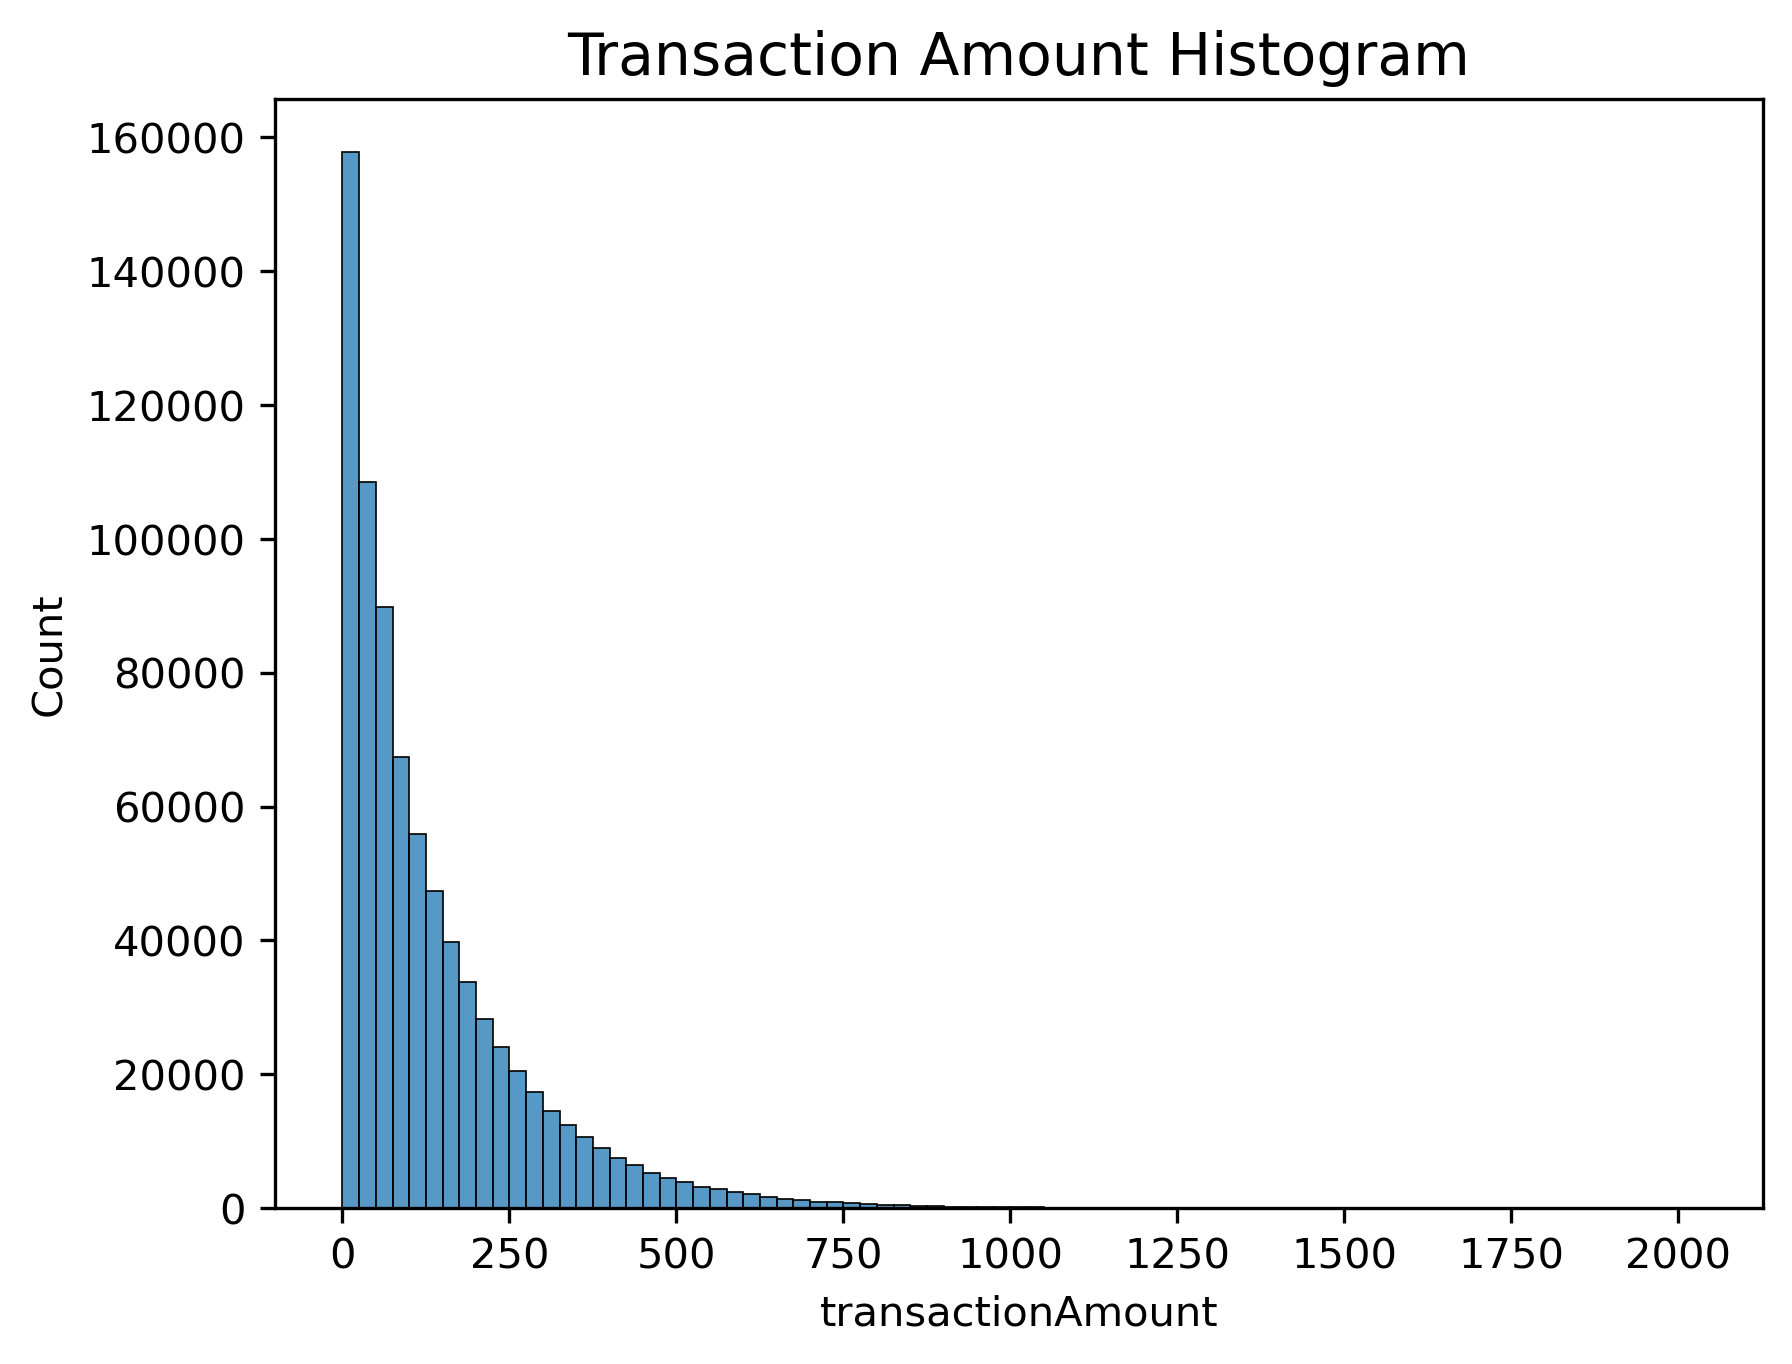

In [16]:
#make a transaction amount histplot

plt.figure(dpi = 300)
plt.title('Transaction Amount Histogram',fontsize=14)
sns.histplot(trans['transactionAmount'], binwidth=25)


C:\Users\fjxpp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Fraud Transaction Histogram'}, xlabel='transactionAmount', ylabel='Count'>

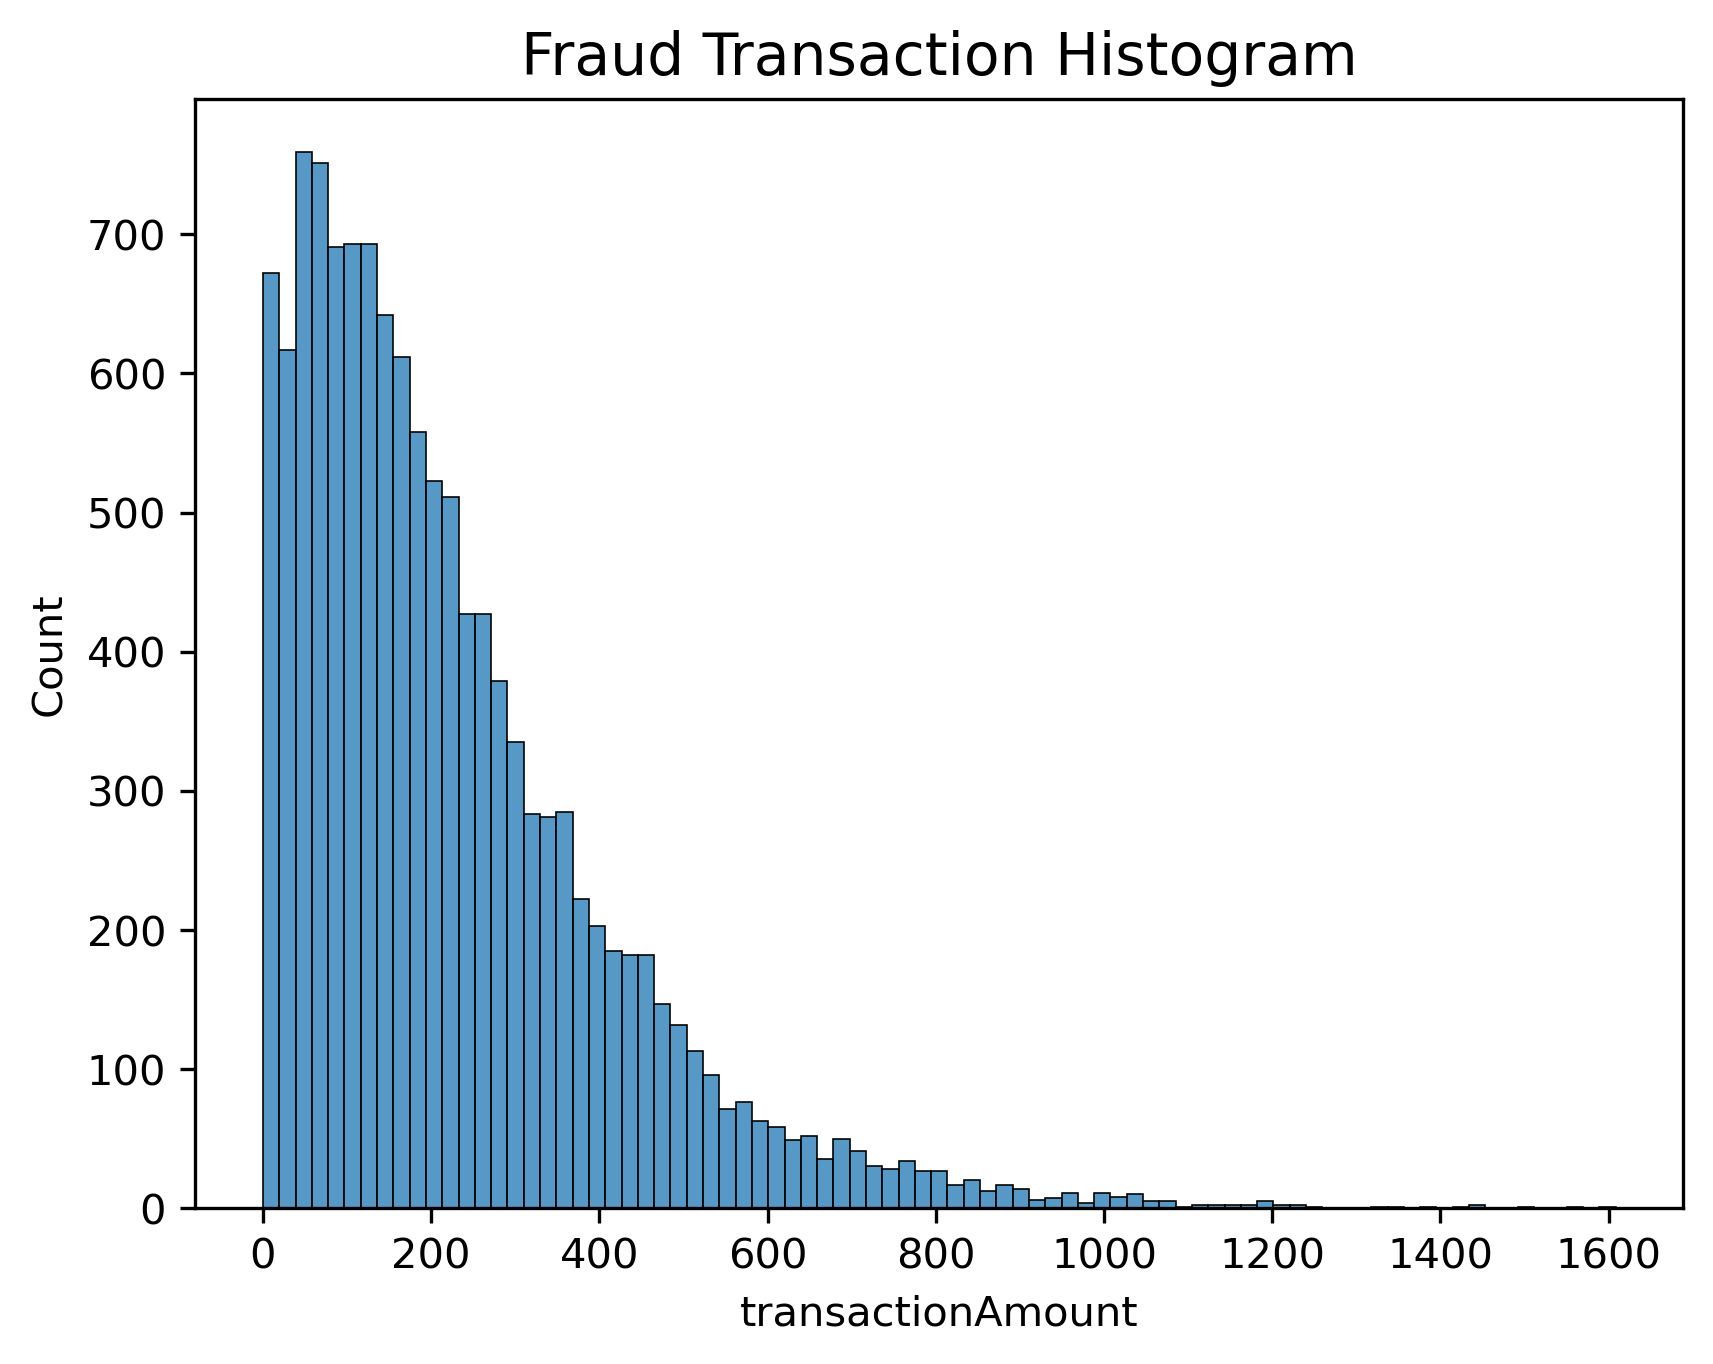

In [17]:
#make a fraud transaction histplot
plt.figure(dpi = 300)
plt.title('Fraud Transaction Histogram',fontsize=14)
sns.histplot(data = trans[trans['isFraud'] == True], x = 'transactionAmount')

# Finds from two plots
<br><br>
<font size="3">
   The major different between the histogram of fraud plot and transaction plot is happened in large amount transaction(over 200).
    <br>
    <br>
    We can assume that the transaction amount is a important feature to determent whether a transaction is fraud or not.

    
</font>

<Axes: title={'center': 'Fraud By Merchant Country'}, xlabel='merchantCountryCode', ylabel='count'>

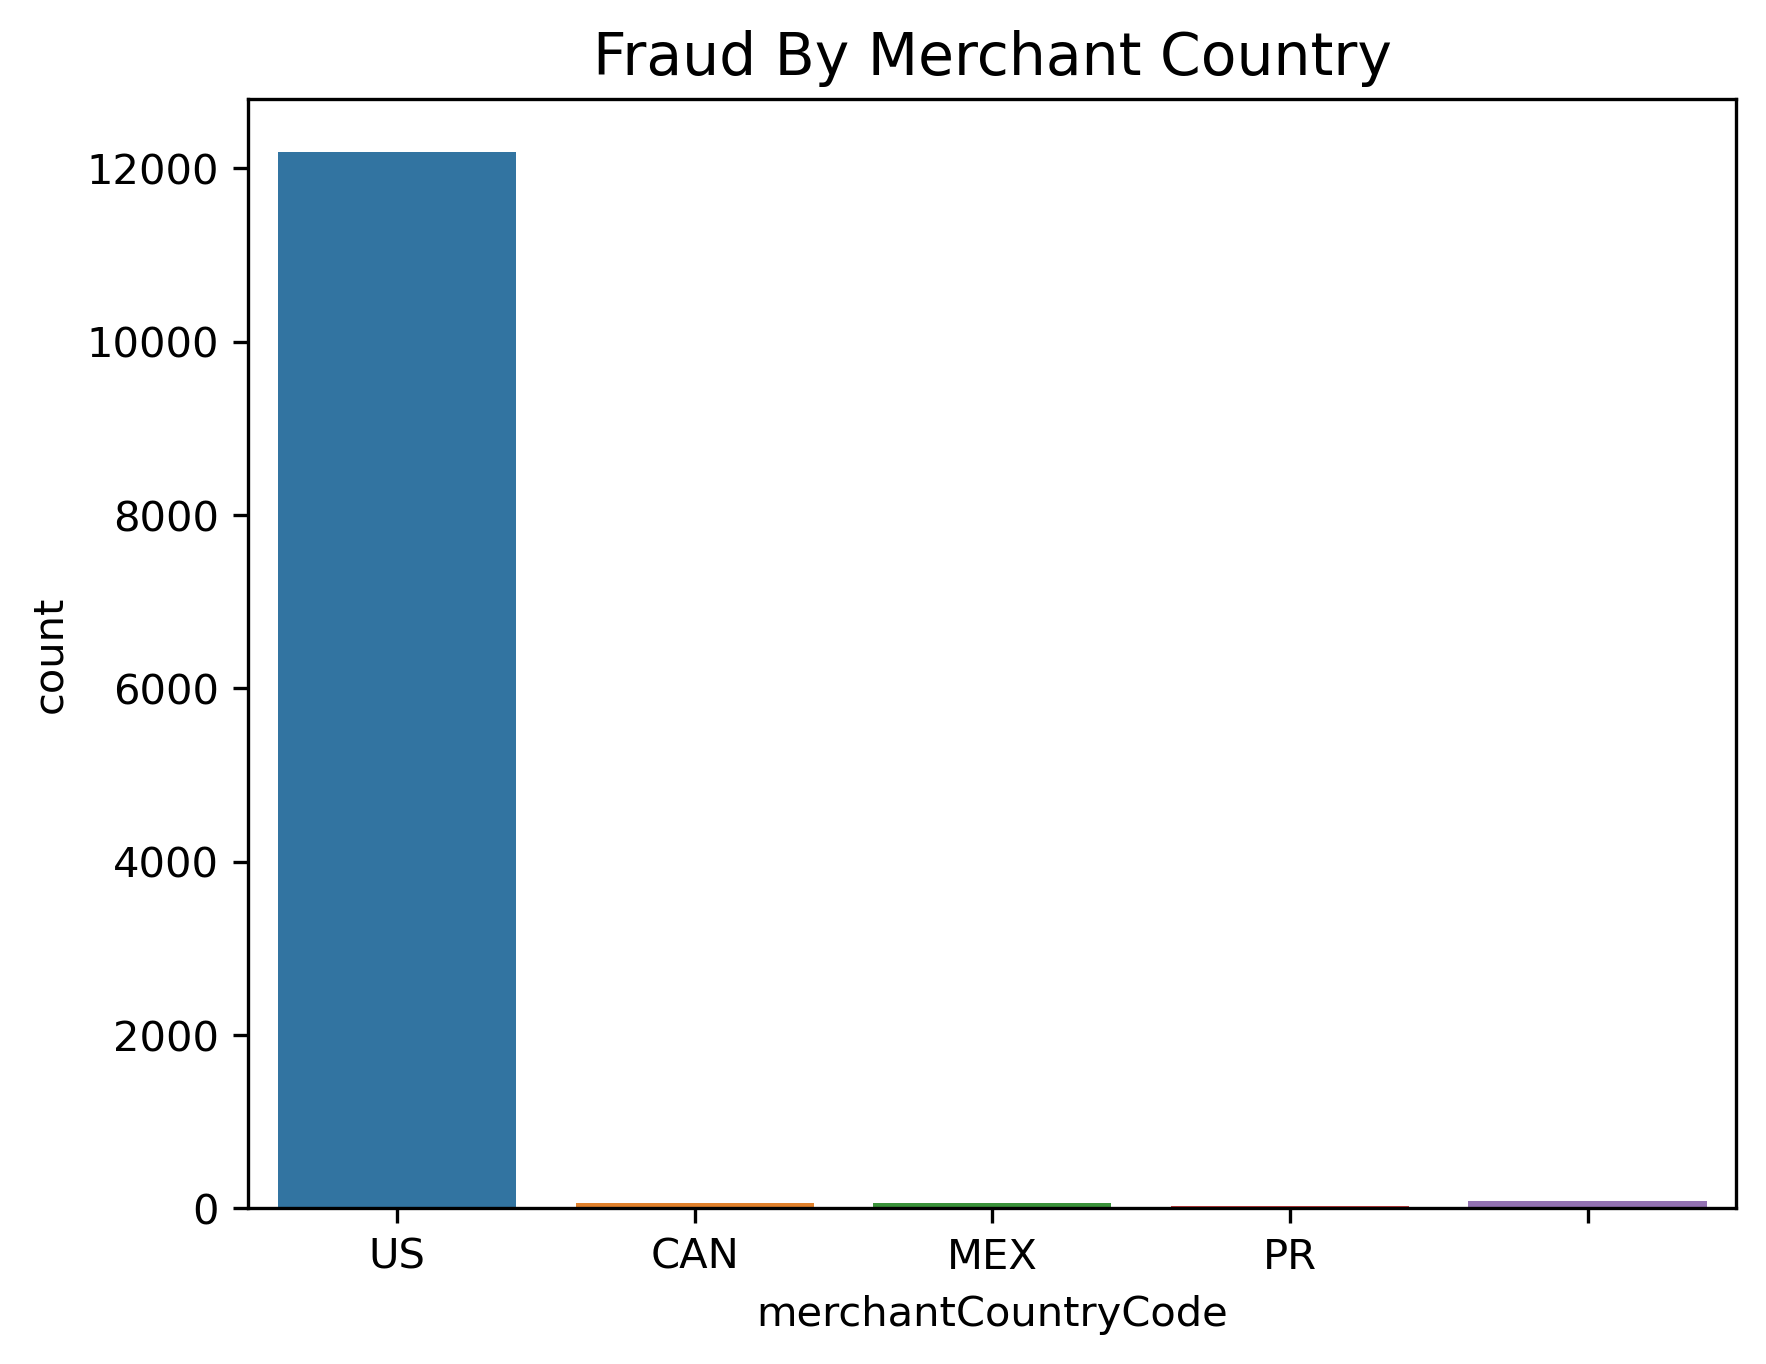

In [18]:
#fraud by merchant country
fraud_by_country = trans[trans['isFraud'] == True]

plt.figure(dpi = 300)
plt.title('Fraud By Merchant Country',fontsize=14)
sns.countplot(x='merchantCountryCode', data=fraud_by_country)

# Data Wrangling - Duplicate Transactions

<font size="3">
We will find all duplicate transaction first, and then seperate the 'Multi-trasaction' and 'Reversal Transaction' via transaction type.

    
</font>

In [19]:
percentage_missing_trans_type = 698/786363 * 100
percentage_missing_trans_type

0.08876307761173911

<font size="3">
In this case, I will assume the missing value in transaction type part is purchase, due to the major transaction type is purchase and the missing value is only 0.08% of total datasize.

    
</font>

In [20]:
#change the data format
trans['transactionDateTime'] = trans['transactionDateTime'].apply(lambda x: datetime.fromisoformat(x))

In [21]:
trans['transactionDateTime'].head()

0   2016-08-13 14:27:32
1   2016-10-11 05:05:54
2   2016-11-08 09:18:39
3   2016-12-10 02:14:50
4   2016-03-24 21:04:46
Name: transactionDateTime, dtype: datetime64[ns]

In [22]:
# sort data with account numerb and transaction date
trans_sorted = trans.sort_values(['accountNumber','transactionDateTime'])
trans_sorted.head(10)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
541900,100088067,100088067,50000,50000.00,2016-01-12 00:59:52,205.13,EZ Putt Putt #982199,US,US,02,...,2014-01-09,2014-01-09,546,546,4615,PURCHASE,0.00,True,False,False
541901,100088067,100088067,50000,49794.87,2016-01-12 19:49:41,46.43,Dinosaur Sandwitch Bar #303701,US,US,05,...,2014-01-09,2014-01-09,546,546,4615,PURCHASE,205.13,True,False,False
541902,100088067,100088067,50000,49748.44,2016-01-17 15:41:46,378.67,Mobile eCards,US,US,05,...,2014-01-09,2014-01-09,402,402,2077,PURCHASE,251.56,False,False,False
541903,100088067,100088067,50000,50000.00,2016-02-02 19:57:18,66.07,EZ Putt Putt #40513,US,US,02,...,2014-01-09,2014-01-09,546,546,4615,PURCHASE,0.00,True,False,False
541904,100088067,100088067,50000,49933.93,2016-02-03 04:48:54,141.60,34th BBQ #412895,US,US,09,...,2014-01-09,2014-01-09,546,546,4615,PURCHASE,66.07,True,False,False
541905,100088067,100088067,50000,49792.33,2016-02-08 06:09:12,259.44,Blue Mountain eCards,US,US,05,...,2014-01-09,2014-01-09,402,402,2077,PURCHASE,207.67,False,False,False
541906,100088067,100088067,50000,49532.89,2016-02-09 18:36:53,32.50,EZ Putt Putt #804489,US,US,09,...,2014-01-09,2014-01-09,402,402,2077,PURCHASE,467.11,True,False,False
541907,100088067,100088067,50000,49500.39,2016-02-09 23:44:13,23.06,South Cafe,US,US,02,...,2014-01-09,2014-01-09,546,546,4615,PURCHASE,499.61,True,False,False
541908,100088067,100088067,50000,49477.33,2016-02-13 20:17:41,56.05,Fresh Flowers,US,US,05,...,2014-01-09,2014-01-09,402,402,2077,PURCHASE,522.67,False,False,False
541909,100088067,100088067,50000,49421.28,2016-02-21 01:14:56,71.35,AMC #724446,US,US,09,...,2014-01-09,2014-01-09,546,546,4615,PURCHASE,578.72,True,True,False


<Axes: title={'center': 'Transaction Type Countplot'}, xlabel='transactionType', ylabel='count'>

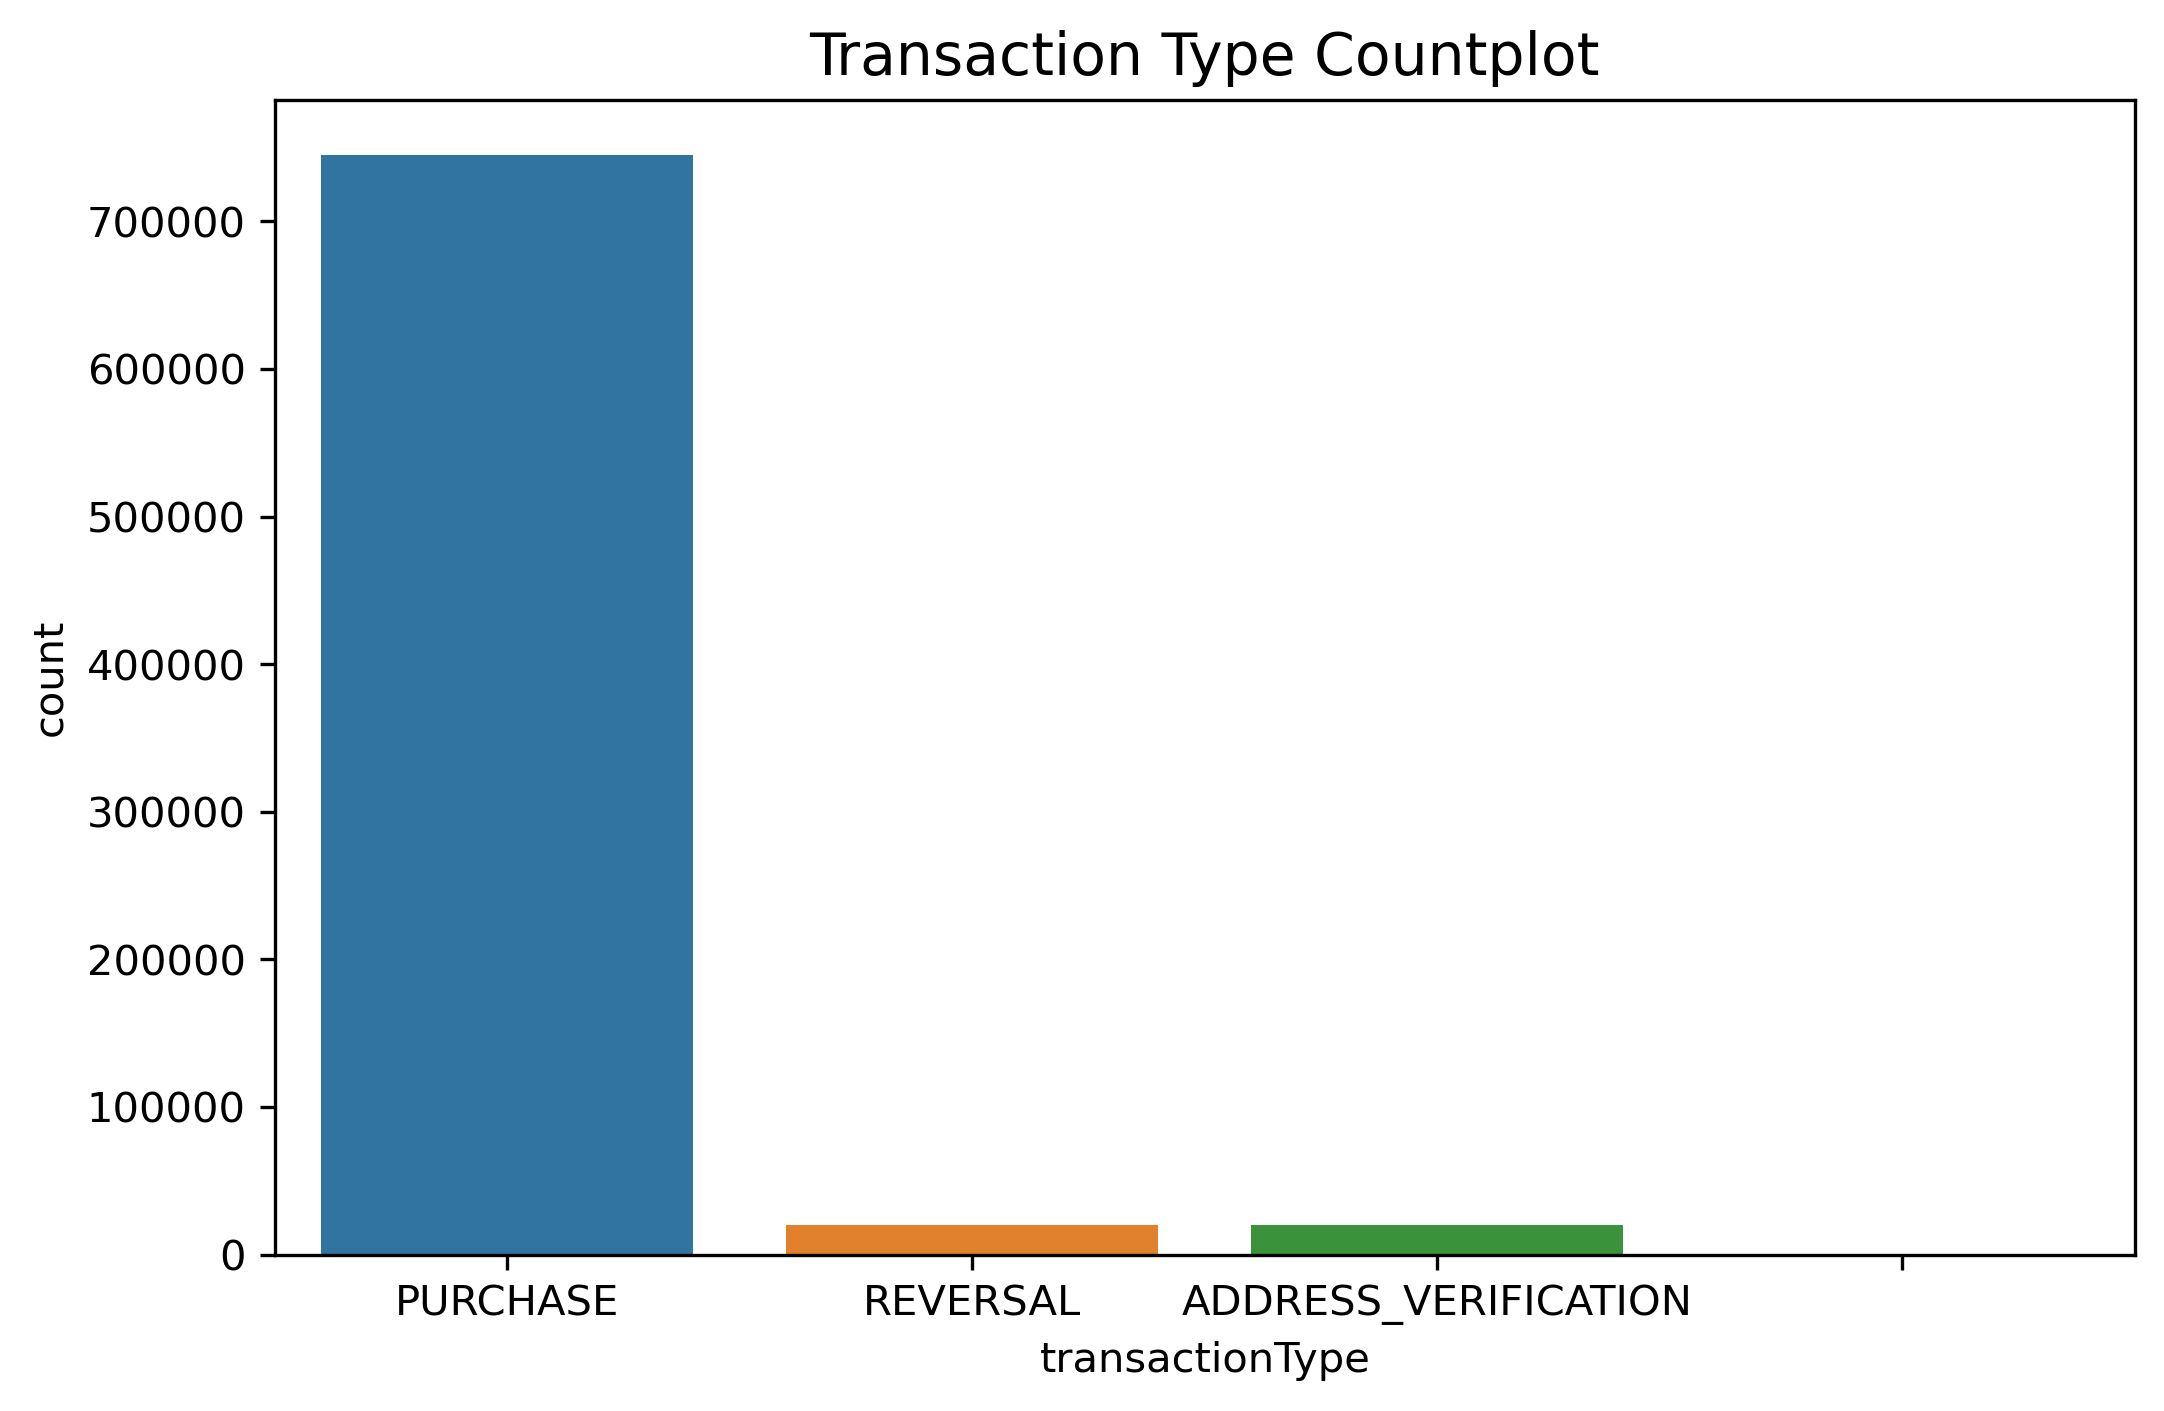

In [23]:
#Transaction Type Countplot
plt.figure(figsize=(8,5), dpi=300)
plt.title('Transaction Type Countplot',fontsize=14)
sns.countplot(x='transactionType', data=trans_sorted)

In [24]:
print(trans_sorted['transactionType'].value_counts())

transactionType
PURCHASE                745193
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
                           698
Name: count, dtype: int64


In [25]:
trans_sorted[trans_sorted['transactionType'] == 'REVERSAL'].head(10)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
541964,100088067,100088067,50000,49811.88,2016-11-20 08:00:04,22.32,AMC #79863,US,US,09,...,2014-01-09,2014-01-09,546,546,4615,REVERSAL,188.12,True,False,False
87920,100328049,100328049,5000,4605.10,2016-01-15 20:36:18,43.74,Lyft,US,US,09,...,2014-01-07,2014-01-07,206,206,2941,REVERSAL,394.90,False,False,False
87936,100328049,100328049,5000,3792.09,2016-03-26 17:35:09,284.97,McDonalds #423357,US,US,02,...,2014-01-07,2014-01-07,206,206,2941,REVERSAL,1207.91,True,False,False
151499,100737756,100737756,250,119.51,2016-06-06 22:56:52,93.67,34th BBQ #436606,US,US,05,...,2015-06-21,2015-06-21,463,463,4317,REVERSAL,130.49,True,False,False
151541,100737756,100737756,250,144.52,2016-08-24 20:21:19,501.29,Best Bistro #262998,US,US,05,...,2015-06-21,2015-06-21,463,463,4317,REVERSAL,105.48,True,False,False
151595,100737756,100737756,250,166.68,2016-12-14 21:45:32,522.20,Boston Cafe #465229,US,US,80,...,2015-06-21,2015-06-21,463,463,4317,REVERSAL,83.32,True,False,False
474247,101376441,101376441,7500,7367.78,2016-07-12 00:44:32,96.63,target.com,US,US,09,...,2015-06-08,2015-06-08,680,680,3110,REVERSAL,132.22,False,False,False
474250,101376441,101376441,7500,7500.00,2016-08-06 17:23:47,0.00,cheapfast.com,US,US,09,...,2015-06-08,2015-06-08,128,128,6683,REVERSAL,0.00,False,False,False
3010,101380713,101380713,10000,2560.93,2016-06-22 22:10:22,5.03,sears.com,US,US,02,...,2015-06-01,2016-06-03,551,551,7553,REVERSAL,7439.07,False,False,False
3052,101380713,101380713,10000,4433.97,2016-10-18 06:54:33,303.72,staples.com,US,US,02,...,2015-06-01,2016-08-28,551,551,7553,REVERSAL,5566.03,False,False,False


In [ ]:
#change the data type
trans_sorted['transactionAmount'] = trans_sorted['transactionAmount'].astype(float)

#find the duplicate transaction
trans_sorted['Duplicated'] = trans_sorted.groupby(['accountNumber', 'transactionAmount'], sort=False)['transactionDateTime'] \
    .apply(lambda x: x.diff().dt.total_seconds().lt(120))

In [28]:
trans_sorted.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,Duplicated
541900,100088067,100088067,50000,50000.00,2016-01-12 00:59:52,205.13,EZ Putt Putt #982199,US,US,02,...,2014-01-09,546,546,4615,PURCHASE,0.00,True,False,False,False
541901,100088067,100088067,50000,49794.87,2016-01-12 19:49:41,46.43,Dinosaur Sandwitch Bar #303701,US,US,05,...,2014-01-09,546,546,4615,PURCHASE,205.13,True,False,False,False
541902,100088067,100088067,50000,49748.44,2016-01-17 15:41:46,378.67,Mobile eCards,US,US,05,...,2014-01-09,402,402,2077,PURCHASE,251.56,False,False,False,False
541903,100088067,100088067,50000,50000.00,2016-02-02 19:57:18,66.07,EZ Putt Putt #40513,US,US,02,...,2014-01-09,546,546,4615,PURCHASE,0.00,True,False,False,False
541904,100088067,100088067,50000,49933.93,2016-02-03 04:48:54,141.60,34th BBQ #412895,US,US,09,...,2014-01-09,546,546,4615,PURCHASE,66.07,True,False,False,False


In [29]:

trans_sorted[trans_sorted['Duplicated'] == True]['transactionType'].value_counts()

PURCHASE                4913
REVERSAL                3824
ADDRESS_VERIFICATION     137
                           8
Name: transactionType, dtype: int64

In [30]:
#find the reversal transaction with transaction type
trans_sorted['is_reversal_duplicate'] = (trans_sorted['transactionType'] == 'REVERSAL') & (trans_sorted['Duplicated'] == True)
trans_sorted['is_reversal_duplicate'].value_counts()

False    782539
True       3824
Name: is_reversal_duplicate, dtype: int64

In [31]:
#find the fraud counts and total fraud amount in reversal transaction
re_fruad_counts = trans_sorted[(trans_sorted['is_reversal_duplicate'] == True) & (trans_sorted['isFraud']==1)]['transactionAmount'].value_counts()
re_fraud_amount = trans_sorted[(trans_sorted['is_reversal_duplicate'] == True) & (trans_sorted['isFraud']==1)]['transactionAmount'].sum()

trans_sorted[trans_sorted['is_reversal_duplicate'] == True]['transactionAmount'].sum()

562291.8899999999

In [32]:
#find the muti-transaction with transaction type
trans_sorted['is_multi_transaction'] =(trans_sorted['transactionType'] != 'REVERSAL') & (trans_sorted['Duplicated'] == True)
trans_sorted['is_multi_transaction'].value_counts()

False    781305
True       5058
Name: is_multi_transaction, dtype: int64

In [33]:
#find the fraud counts and total fraud amount in reversal transaction
mu_fruad_counts = trans_sorted[(trans_sorted['is_multi_transaction'] == True) & (trans_sorted['isFraud']==1)]['transactionAmount'].value_counts()
mu_fraud_amount = trans_sorted[(trans_sorted['is_multi_transaction'] == True) & (trans_sorted['isFraud']==1)]['transactionAmount'].sum()

trans_sorted[trans_sorted['is_multi_transaction'] == True]['transactionAmount'].sum()

742053.52

In [34]:
#report outputs
total_reversed_transaction = trans_sorted[trans_sorted['is_reversal_duplicate'] == True]['transactionAmount'].sum()
total_multi_transaction = trans_sorted[trans_sorted['is_multi_transaction'] == True]['transactionAmount'].sum()
total_transaction = trans_sorted['transactionAmount'].sum()
total_fraud = trans_sorted[trans_sorted['isFraud'] == True]['transactionAmount'].sum()
re_fraud_amount_percentage = re_fraud_amount/total_reversed_transaction*100
mu_fraud_amount_percentage = mu_fraud_amount/total_multi_transaction*100


data = {'Total Reversed Transaction Amount': [total_reversed_transaction],
        'Total Multi-Transaction Amount': [total_multi_transaction],
        'Total Transaction Amount': [total_transaction],
        'Total Fraud Amount': [total_fraud],
        'Reversed Transaction Fraud Amount': [re_fraud_amount],
        'Muti-Transaction Fraud Amount': [mu_fraud_amount],
        'Reversed Transaction Fraud Amount Percantage': [re_fraud_amount_percentage],
        'Muti-Transaction Fraud Amount Percentage': [mu_fraud_amount_percentage],
        'Total Fraud Amount Percentage': [total_fraud/total_transaction*100],
        'Average Reversal Transaction Amount': [562291.89/3824],
        'Average Muti-Transaction Amount': [742053.52/5058]}

# Create DataFrame
df = pd.DataFrame(data)
df


,Total Reversed Transaction Amount,Total Multi-Transaction Amount,Total Transaction Amount,Total Fraud Amount,Reversed Transaction Fraud Amount,Muti-Transaction Fraud Amount,Reversed Transaction Fraud Amount Percantage,Muti-Transaction Fraud Amount Percentage,Total Fraud Amount Percentage,Average Reversal Transaction Amount,Average Muti-Transaction Amount
0,562291.89,742053.52,1.077206e+08,2796505.89,17144.17,17781.61,3.04898,2.396271,2.596074,147.042858,146.708881


## APPLY CLUSTERING MODEL

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import pandas as pd

if 'transactionAmount' in trans_sorted.columns and 'currentBalance' in trans_sorted.columns:
    # Filter data
    df = trans_sorted[trans_sorted['transactionType'] != "PURCHASE"]

    # Scaling features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df[['transactionAmount', 'currentBalance']])

    # Define the KMeans model
    kmeans = KMeans(n_clusters=2)

    # Fit model to scaled data
    df['Cluster'] = kmeans.fit_predict(scaled_features)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(x=df['currentBalance'], y=df['transactionAmount'], c=df['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)
    plt.title('K-means Clustering on Current Balance vs. Transaction Amount')
    plt.xlabel('Current Balance')
    plt.ylabel('Transaction Amount')
    plt.colorbar(scatter, label='Cluster')
    plt.grid(True)
    plt.show()
else:
    print("Error: DataFrame does not contain the required columns.")

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
    
if 'transactionAmount' in trans_sorted.columns and 'currentBalance' in trans_sorted.columns:
    # Filter data
    df = trans_sorted[trans_sorted['transactionType'] != "PURCHASE"]

    # Scaling features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df[['transactionAmount', 'currentBalance']])

    # Determine the range of clusters to evaluate
    range_n_clusters = range(2, 11)
    sse = {}
    sil_scores = {}

    for n_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = kmeans.fit_predict(scaled_features)
        sse[n_clusters] = kmeans.inertia_  # SSE: Sum of squared distances to closest cluster center
        silhouette_avg = silhouette_score(scaled_features, cluster_labels)
        sil_scores[n_clusters] = silhouette_avg
        print(f"For n_clusters={n_clusters}, the SSE is {sse[n_clusters]} and the silhouette score is {silhouette_avg:.4f}")

    # Plot the Elbow method and Silhouette scores
    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.plot(list(sse.keys()), list(sse.values()), marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('SSE (Inertia)')
    plt.title('Elbow Method For Optimal k')

    plt.subplot(1, 2, 2)
    plt.plot(list(sil_scores.keys()), list(sil_scores.values()), marker='o', color='red')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score For Optimal k')
    plt.tight_layout()
    plt.show()

    # Use the optimal number of clusters
    best_k = max(sil_scores, key=sil_scores.get)  # Determine the best k based on silhouette score
    print(f"The best number of clusters based on silhouette score is: {best_k}")

    optimal_kmeans = KMeans(n_clusters=best_k, random_state=10)
    df['Cluster'] = optimal_kmeans.fit_predict(scaled_features)

    # Plotting the final clustering
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(x=df['currentBalance'], y=df['transactionAmount'], c=df['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)
    plt.title(f'K-means Clustering with {best_k} Clusters on Transaction Data')
    plt.xlabel('Current Balance')
    plt.ylabel('Transaction Amount')
    plt.colorbar(scatter, label='Cluster')
    plt.grid(True)
    plt.show()

else:
    print("Error: DataFrame does not contain the required columns.")

# Feature Engineering

In [35]:
percentage_missing_merchant_country = 724/786363 * 100
percentage_missing_merchant_country

0.0920694386689099

<font size="3">
In this case, I will assume the missing value in merchant country part is US, due to the major merchant country is purchase and the missing value is only 0.09% of total datasize.
    
</font>


In [36]:
#change the data type
trans_sorted['accountOpenDate'] = pd.to_datetime(trans_sorted['accountOpenDate'])

In [37]:
#add 4 new features
trans_sorted['date_diff_trans_open'] = trans_sorted['transactionDateTime'] - trans_sorted['accountOpenDate']
trans_sorted['percentage_trans_available'] = trans_sorted['transactionAmount'] / trans_sorted['availableMoney'] * 100
trans_sorted['percentage_trans_limit'] =  trans_sorted['transactionAmount'] / trans_sorted['creditLimit'] * 100
trans_sorted['outside_US'] = (trans_sorted['merchantCountryCode'] != 'US') | (trans_sorted['merchantCountryCode'] == '')

   get the total fruads of each account

In [38]:
#create a table to see each account's fraud counts
df_fraud_count = trans_sorted.groupby(['accountNumber'])['isFraud'].sum().reset_index()
df_fraud_count['Fraud_counts'] = df_fraud_count['isFraud']
df_fraud_count.drop('isFraud', axis = 1, inplace=True)
df_trans_count = trans_sorted.groupby(['accountNumber'])['isFraud'].size().reset_index(name = 'Transaction_counts')
df_fraud_trans_count = pd.merge(df_fraud_count, df_trans_count, on='accountNumber')
df_fraud_trans_count['Fraud_percentage'] = df_fraud_trans_count['Fraud_counts'] / df_fraud_trans_count['Transaction_counts'] * 100 

In [39]:
df_fraud_trans_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   accountNumber       5000 non-null   int64  
 1   Fraud_counts        5000 non-null   int64  
 2   Transaction_counts  5000 non-null   int64  
 3   Fraud_percentage    5000 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 195.3 KB


# Modeling 

<font size="1">
first, we will use the orginal data without resampling.
</font> 

# Feature Selection

In [40]:
trans_sorted.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'currentBalance', 'cardPresent',
       'expirationDateKeyInMatch', 'isFraud', 'Duplicated',
       'is_reversal_duplicate', 'is_multi_transaction', 'date_diff_trans_open',
       'percentage_trans_available', 'percentage_trans_limit', 'outside_US'],
      dtype='object')

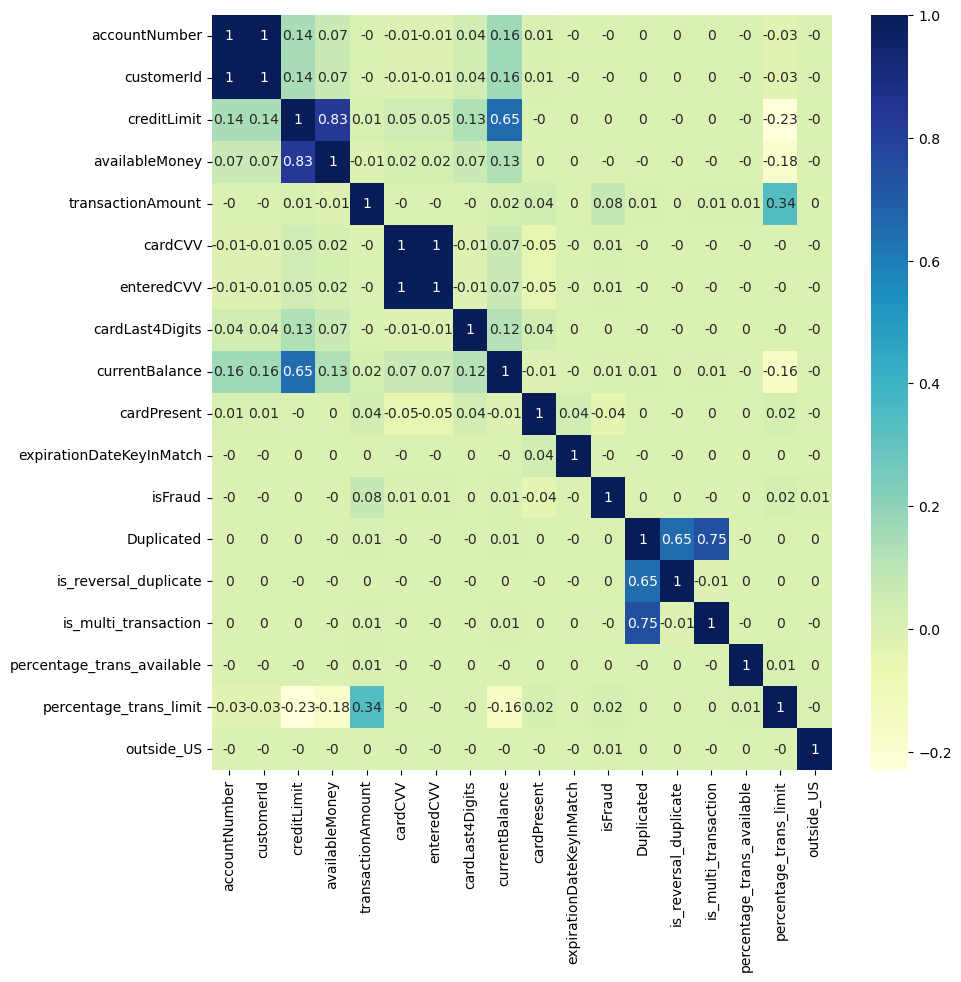

In [61]:
# Calculate correlation matrix
corr = trans_sorted.corr().round(2)


plt.figure(figsize=(10, 10), dpi=100)

sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

In [42]:
df_standard = trans_sorted[['creditLimit', 'availableMoney', 'transactionDateTime', 'transactionAmount', 'currentBalance', 'cardPresent', 'expirationDateKeyInMatch', 'Duplicated', 'is_reversal_duplicate', 'is_multi_transaction', 'date_diff_trans_open', 'percentage_trans_available', 'percentage_trans_limit', 'outside_US', 'isFraud']]
df_standard.loc[:, 'transactionDateTime'] = df_standard['transactionDateTime'].astype('int64')
df_standard.loc[:, 'date_diff_trans_open'] = df_standard['transactionDateTime'].astype('int64')

x = df_standard.iloc[:,:-1]
y = df_standard.iloc[:,-1]

C:\Users\fjxpp\AppData\Local\Temp\ipykernel_21472\2299330992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_standard.loc[:, 'transactionDateTime'] = df_standard['transactionDateTime'].astype('int64')
C:\Users\fjxpp\AppData\Local\Temp\ipykernel_21472\2299330992.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_standard.loc[:, 'date_diff_trans_open'] = df_standard['transactionDateTime'].astype('int64')


# Split data in to train group and test group

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)

In [44]:
x = df_standard.iloc[:,:-1]
y = df_standard.iloc[:,-1]

# XG-Boost

<font size="1">
XG-Boost can automatically weight data, which means it can work well in the imbalanced dataset (fraud detection).
</font> 

In [45]:
import xgboost as xgb

params = {
    'n_jobs': -1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth': 5,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.1,
    'reg_lambda': 1,
    'random_state': 11
}

clf = xgb.XGBClassifier(**params)

In [46]:
clf.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=11, ...)

In [47]:
y_pred_test = clf.predict(x_test)


# evaluate model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score

cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=11)
scores = cross_val_score(clf, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)
ac=accuracy_score(y_pred_test,y_test)*100
# summarize performance
print('Mean ROC AUC: %.3f' % statistics.mean(scores))
print('Accuracy Score: %.3f' % ac)

Mean ROC AUC: 0.707
Accuracy Score: 98.445


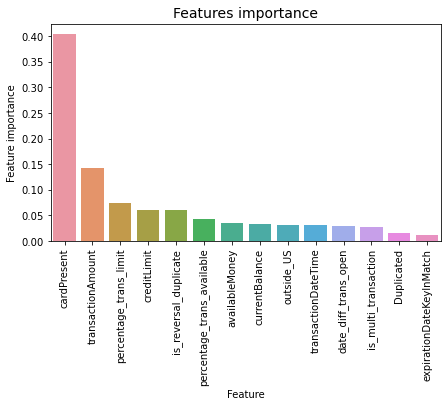

In [48]:
tmp = pd.DataFrame({'Feature': df_standard.columns[:-1], 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

# Resampling(over_sample)

<font size="1">
I use over-smaple tool from imblearn in this case.
</font>

In [49]:
x = df_standard.iloc[:,:-1]
y = df_standard.iloc[:,-1]

from imblearn.over_sampling import SMOTE

x_resampled, y_resampled = SMOTE().fit_resample(x, y)

# Random Forest after Resampling 

<font size="1">
Random Forest is good at handle&nbsp;high-dimensional datasets with a large number of features. But for the imbalance data we need to resample the data first.
</font> 

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=11)

In [51]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion='gini',
                             n_estimators=100,
                             verbose=False)

In [52]:
clf.fit(x_train,y_train)

RandomForestClassifier(verbose=False)

In [53]:
y_pred_test = clf.predict(x_test)


# evaluate model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=11)
scores = cross_val_score(clf, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)
ac=accuracy_score(y_pred_test,y_test)*100
# summarize performance
print('Mean ROC AUC: %.3f' % statistics.mean(scores))
print('Accuracy Score: %.3f' % ac)

Mean ROC AUC: 0.625
Accuracy Score: 97.326


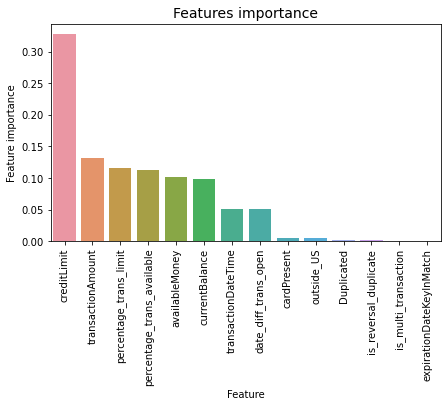

In [54]:
tmp = pd.DataFrame({'Feature': df_standard.columns[:-1], 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

# Logistic Regression After Resampling
<font size="1">
Logistic regression is a statistical algorithm for binary classification, which is also workable in fraud detection. Like random forest model, we need to resample the imbalance data first.
</font> 

In [55]:
from sklearn.linear_model import LogisticRegression
l1=LogisticRegression()
l1.fit(x_train,y_train)

LogisticRegression()

In [56]:
y_pred_test = clf.predict(x_test)


# evaluate model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=11)
scores = cross_val_score(l1, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)
ac=accuracy_score(y_pred_test,y_test)*100
# summarize performance
print('Mean ROC AUC: %.3f' % statistics.mean(scores))
print('Accuracy Score: %.3f' % ac)

Mean ROC AUC: 0.500
Accuracy Score: 97.326
